In [6]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/Mixture + Analytes/3 Analytes/')

from utils import add_noise, plot_lda_decision_boundary
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')
os.chdir('/home/soham/Desktop/GitHub/BTP/')

In [7]:
total_data = pd.read_csv('data/smote/labelled.csv')
total_data = total_data[['Sensor1','Sensor2','Sensor3','label','CFU/mL']]
total_data = total_data.replace(to_replace=0, value=1)
total_data.head()

,Sensor1,Sensor2,Sensor3,label,CFU/mL
0,-68.02,70.734,52.47,1,30500000.0
1,-95.70,50.162,32.63,1,3050000.0
2,-99.96,-8.390,-10.41,1,305000.0
3,-107.42,-18.700,-23.93,1,30500.0
4,-109.94,-19.620,-27.24,1,3050.0


In [8]:
''' Here our aim is not to classify the data but to find the concentration values (CFU/mL) of the data.'''
''' Since data trends for each of the classes - Analyte1, 2, 3 - differs, we shall have to train 3 seperate models for it.'''

analyte1 = total_data[total_data['label'] == 1]
analyte2 = total_data[total_data['label'] == 2]
analyte3 = total_data[total_data['label'] == 3]

### Metric -- R-squared -- we are predicting on log(CFU/mL) values

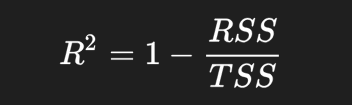
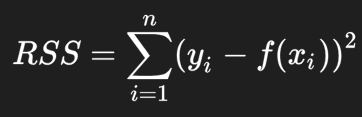
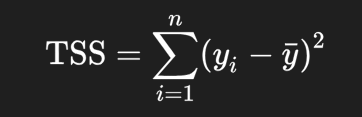

## Lasso Regression


R-squared =  0.9789196261210374
MSE =  0.5983901839201287
MAE = 0.6259196548353901


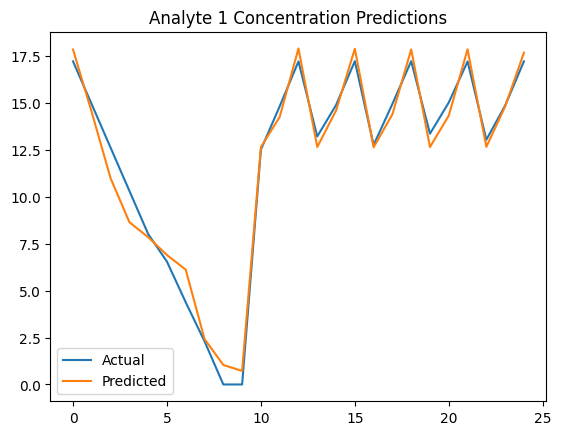


R-squared =  0.7788433760111029
MSE =  7.706780316008321
MAE = 1.525005977924705


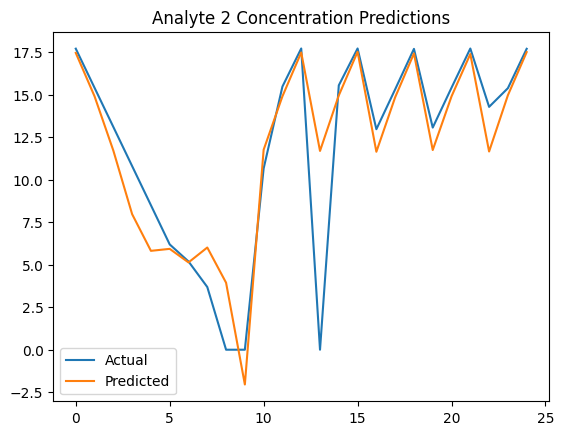


R-squared =  0.9379799896560709
MSE =  1.2555699351275984
MAE = 0.7608653098286442


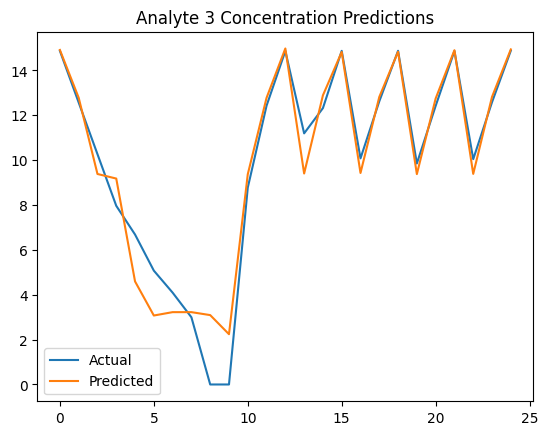

In [9]:
lasso_regressors = []
analyte_datas = [analyte1, analyte2, analyte3]
lasso_r_squared = []
lasso_mse = []
lasso_mae = []

for i in range(3):

    data = analyte_datas[i]
    X = data[['Sensor1','Sensor2','Sensor3']]
    Y = np.log(data['CFU/mL'])

    regressor = Lasso()                     # Due to the presence of noise & exponential nature of data, we use Lasso regression
    regressor.fit(X,Y)

    print('\nR-squared = ', regressor.score(X,Y))             # R-squared value
    lasso_r_squared.append(regressor.score(X,Y))
    
    pred = regressor.predict(X)
    print('MSE = ',mean_squared_error(pred, Y))
    lasso_mse.append(mean_squared_error(pred, Y))

    print('MAE =', np.mean(np.abs(pred - Y)))
    lasso_mae.append(np.mean(np.abs(pred - Y)))

    lasso_regressors.append(regressor)

    x = [i for i in range(len(Y))]
    plt.plot(x,Y, label='Actual')
    plt.plot(x,pred, label='Predicted')
    plt.title(f'Analyte {i+1} Concentration Predictions')
    plt.legend()
    plt.show()

## Ridge Regression


R-squared =  0.9826349635566699
MSE =  0.4929261411949593
MAE = 0.5831704631369874


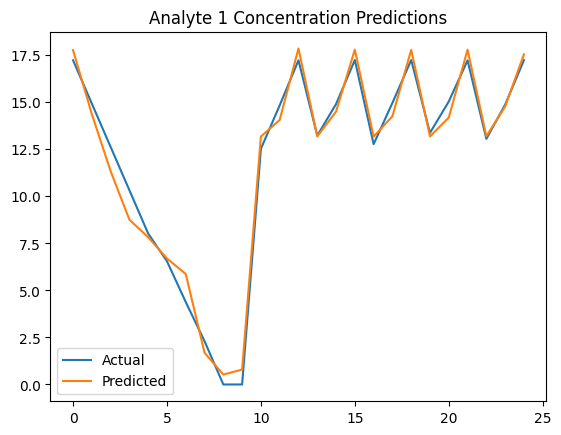


R-squared =  0.7794747263083139
MSE =  7.6847792655523515
MAE = 1.5238446187078574


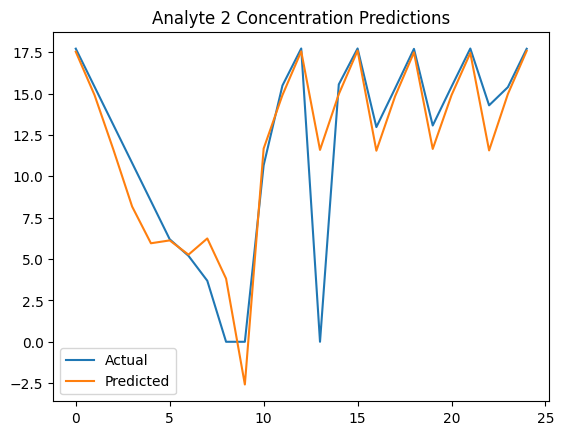


R-squared =  0.9398770183507187
MSE =  1.2171653592195042
MAE = 0.7227998049567304


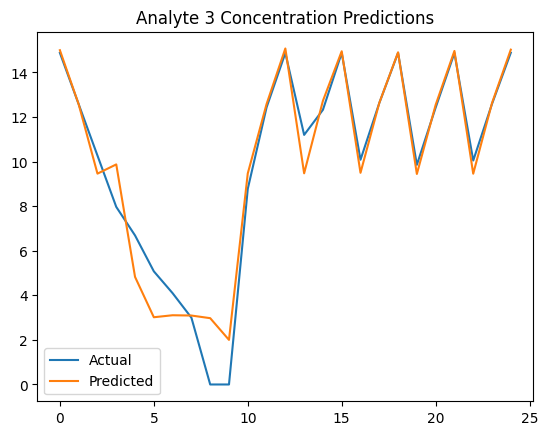

In [10]:
ridge_regressors = []
analyte_datas = [analyte1, analyte2, analyte3]
ridge_r_squared = []
ridge_mse = []
ridge_mae = []

for i in range(3):

    data = analyte_datas[i]
    X = data.iloc[:,:3]
    Y = np.log(data['CFU/mL'])

    regressor = Ridge()                     # Due to the presence of noise & exponential nature of data, we use Lasso regression
    regressor.fit(X,Y)

    print('\nR-squared = ', regressor.score(X,Y))             # R-squared value
    ridge_r_squared.append(regressor.score(X,Y))
    
    pred = regressor.predict(X)
    print('MSE = ',mean_squared_error(pred, Y))
    ridge_mse.append(mean_squared_error(pred, Y))

    print('MAE =', np.mean(np.abs(pred - Y)))
    ridge_mae.append(np.mean(np.abs(pred - Y)))

    ridge_regressors.append(regressor)


    x = [i for i in range(len(Y))]
    plt.plot(x,Y, label='Actual')
    plt.plot(x,pred, label='Predicted')
    plt.title(f'Analyte {i+1} Concentration Predictions')
    plt.legend()
    plt.show()

## Combined Predictions


R-squared =  0.9816878889626881
MSE =  0.5198099215174904
MAE = 0.5893219664481739


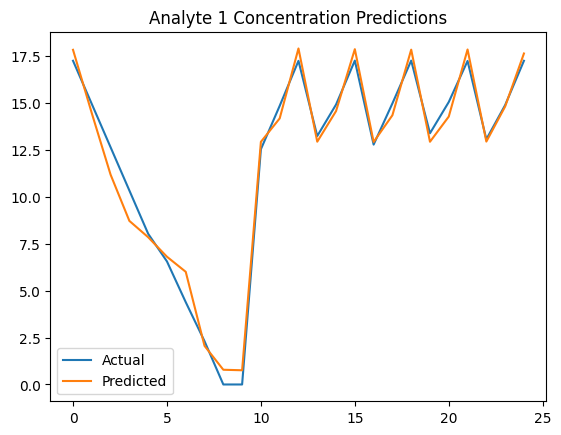


R-squared =  0.7793156150794437
MSE =  7.690323911987064
MAE = 1.522130237069934


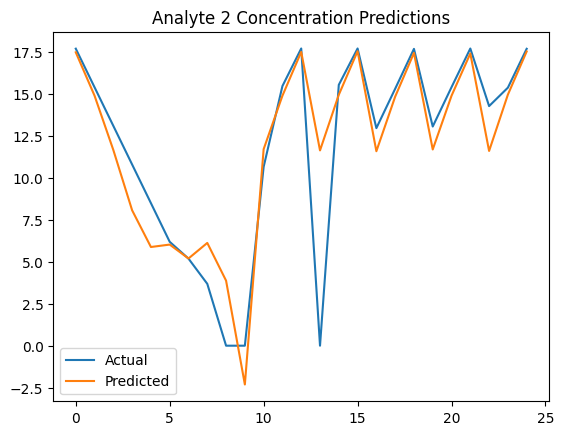


R-squared =  0.9393959225287862
MSE =  1.226904948854917
MAE = 0.7388443380766144


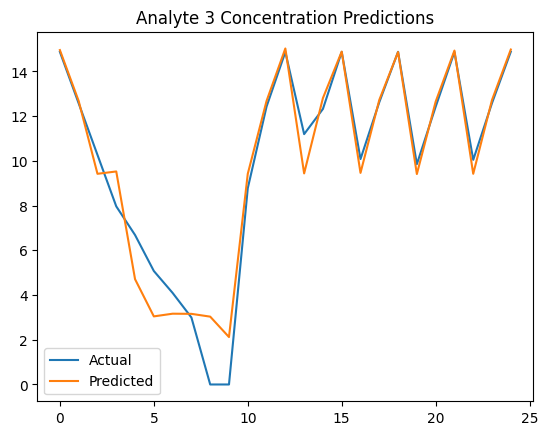

In [15]:
analyte_datas = [analyte1, analyte2, analyte3]
r_squared = []
mse = []
mae = []

i = 0

for data in analyte_datas:

    X = data[['Sensor1','Sensor2','Sensor3']]
    Y = np.log(data['CFU/mL'])

    lasso_pred = lasso_regressors[data['label'].iloc[0]-1].predict(X)
    ridge_pred = ridge_regressors[data['label'].iloc[0]-1].predict(X)

    final_pred = 0.5*(lasso_pred + ridge_pred)

    r_sq = 1 - (np.sum((Y - final_pred) ** 2) / np.sum((Y - np.mean(Y)) ** 2))
    print('\nR-squared = ', r_sq)
    r_squared.append(r_sq)
    
    print('MSE = ',mean_squared_error(final_pred, Y))
    mse.append(mean_squared_error(final_pred, Y))

    print('MAE =', np.mean(np.abs(final_pred - Y)))
    mae.append(np.mean(np.abs(final_pred - Y)))

    x = [i for i in range(len(Y))]
    plt.plot(x,Y, label='Actual')
    plt.plot(x,final_pred, label='Predicted')
    plt.title(f'Analyte {i+1} Concentration Predictions')
    i+=1
    plt.legend()
    plt.show()

## Comparison of Results

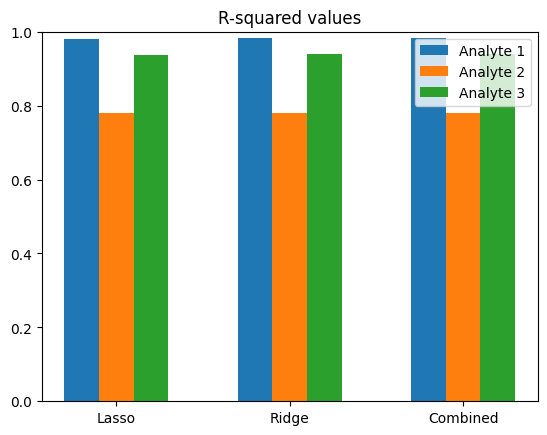

In [12]:
x = [1,2,3]

plt.bar([0.8,1.8,2.8],[lasso_r_squared[0], ridge_r_squared[0], r_squared[0]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 1')
plt.bar([1.0,2.0,3.0],[lasso_r_squared[1], ridge_r_squared[1], r_squared[1]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 2')
plt.bar([1.2,2.2,3.2],[lasso_r_squared[2], ridge_r_squared[2], r_squared[2]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 3')

plt.ylim(0,1)
plt.xticks(x,['Lasso','Ridge','Combined'])
plt.title('R-squared values')
plt.legend()
plt.show()

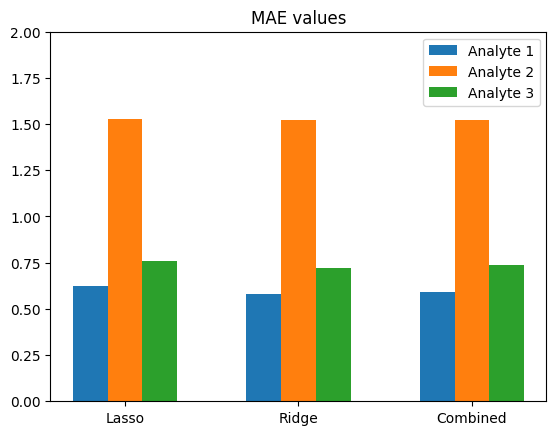

In [13]:
x = [1,2,3]

plt.bar([0.8,1.8,2.8],[lasso_mae[0], ridge_mae[0], mae[0]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 1')
plt.bar([1.0,2.0,3.0],[lasso_mae[1], ridge_mae[1], mae[1]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 2')
plt.bar([1.2,2.2,3.2],[lasso_mae[2], ridge_mae[2], mae[2]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 3')

plt.ylim(0,2)
plt.xticks(x,['Lasso','Ridge','Combined'])
plt.title('MAE values')
plt.legend()
plt.show()

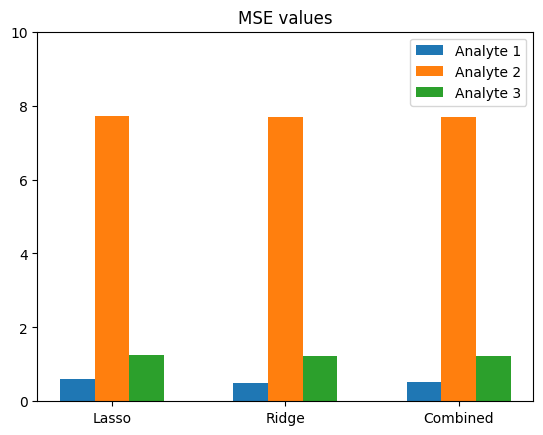

In [14]:
x = [1,2,3]

plt.bar([0.8,1.8,2.8],[lasso_mse[0], ridge_mse[0], mse[0]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 1')
plt.bar([1.0,2.0,3.0],[lasso_mse[1], ridge_mse[1], mse[1]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 2')
plt.bar([1.2,2.2,3.2],[lasso_mse[2], ridge_mse[2], mse[2]], tick_label=['Lasso','Ridge','Combined'], width=0.2, label='Analyte 3')

plt.ylim(0,10)
plt.xticks(x,['Lasso','Ridge','Combined'])
plt.title('MSE values')
plt.legend()
plt.show()